<a href="https://colab.research.google.com/github/juanosalvador/T-cnicas-de-Clustering/blob/main/DBSCAN_MAKE_BLOBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


[tutorial dbscan](https://towardsdatascience.com/how-to-use-dbscan-effectively-ed212c02e62)


In [93]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs 
from sklearn.cluster import DBSCAN

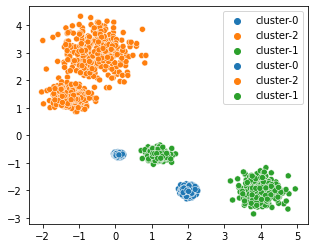

In [112]:
centers = [[2,-2],[4,-2],[-0.5,3]]
X, y = make_blobs(n_samples=1000, centers=centers, n_features=2, cluster_std=[0.1,0.3,0.5],
                  random_state=0)

X_scaled = StandardScaler().fit_transform(X)

figure = plt.figure(figsize=(5,4))
sns.scatterplot(x=X[:,0],y=X[:,1], hue = ['cluster-{}'.format(x) for x in y])
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue = ['cluster-{}'.format(x) for x in y])
plt.show()

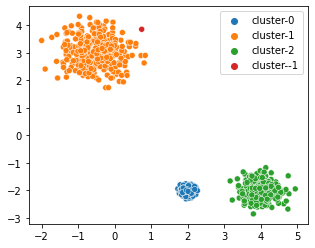

In [113]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_
fig = plt.figure(figsize=(5, 4))
sns.scatterplot(x = X[:,0], y = X[:,1], hue=["cluster-{}".format(x) for x in labels])
plt.show()

In [114]:
np.unique(labels,return_counts=True)

(array([-1,  0,  1,  2]), array([  1, 334, 332, 333]))

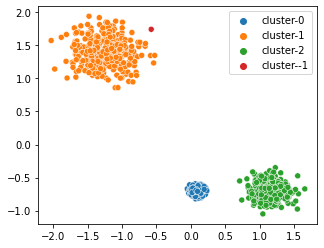

In [115]:
db = DBSCAN(eps=0.5, min_samples=10).fit(X)
labels = db.labels_
figure = plt.figure(figsize=(5,4))
sns.scatterplot(x = X_scaled[:,0], y = X_scaled[:,1],hue=["cluster-{}".format(x) for x in labels])
plt.show()

1.0
0.5
0.3333333333333333
0.25
0.2
0.16666666666666666
0.14285714285714285
0.125
0.1111111111111111
0.1


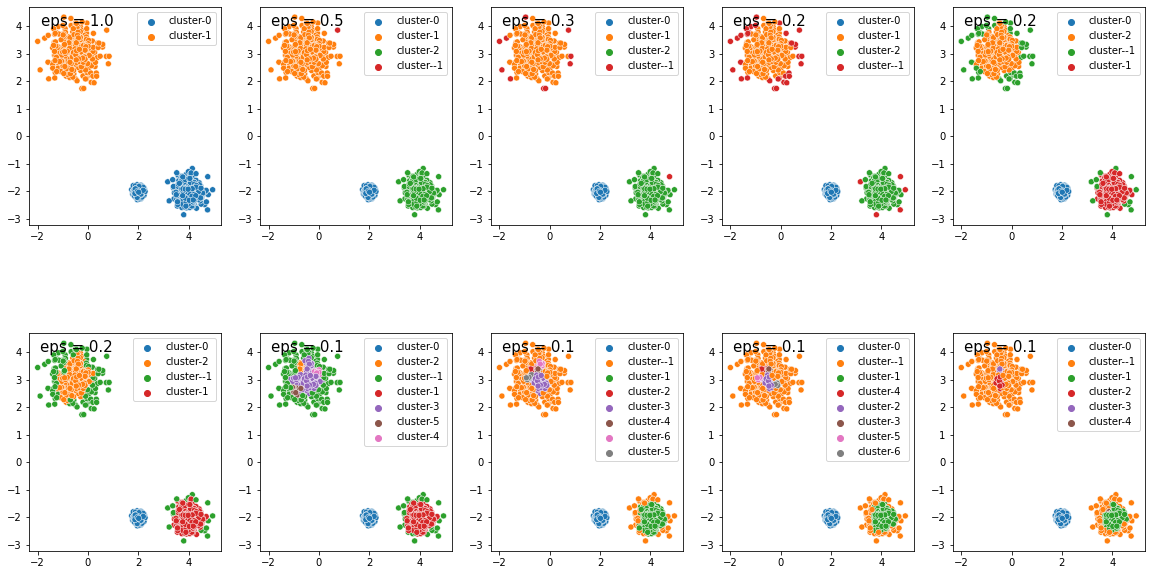

In [116]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(hspace=.5, wspace=.2)
i = 1
for x in range(10, 0, -1):
    eps = 1/(11-x)
    db = DBSCAN(eps=eps, min_samples=10).fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    
    print(eps)
    ax = fig.add_subplot(2, 5, i)
    ax.text(1, 4, "eps = {}".format(round(eps, 1)), fontsize=15, ha="right")
    sns.scatterplot(x = X[:,0], y = X[:,1], hue=["cluster-{}".format(x) for x in labels])
    
    i += 1

# <center><h1> A Systematic Method for Tuning the eps Value </h1></center>

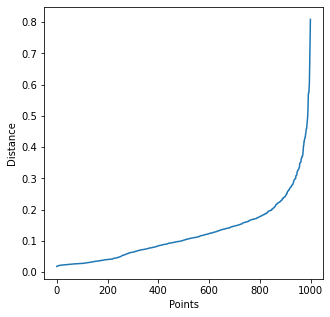

In [117]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=20)
neighbors = nearest_neighbors.fit(X)
distances, indices = neighbors.kneighbors(X)


distances = np.sort(distances[:,10], axis=0)


fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.show()


In [118]:
!pip install kneed

0.21745280540270437


<Figure size 360x360 with 0 Axes>

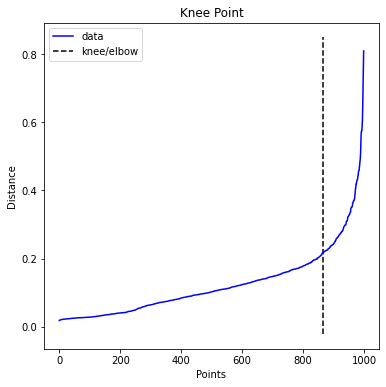

In [119]:
from kneed import KneeLocator
i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

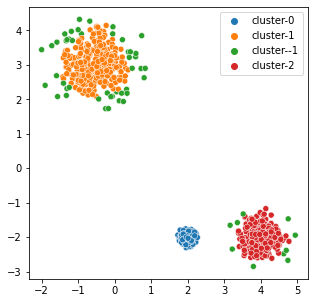

In [123]:
db = DBSCAN(eps=distances[knee.knee], min_samples=10).fit(X)
labels = db.labels_

fig = plt.figure(figsize=(5, 5))
sns.scatterplot(x = X[:,0], y = X[:,1], hue=["cluster-{}".format(x) for x in labels])
#plt.savefig("dbscan_with_knee.png", dpi=300)
plt.show()

In [125]:
unique_labels = np.unique(labels)

In [126]:
n_clusters_ = len(unique_labels) - (1 if -1 in labels else 0)

In [128]:
n_clusters_

3

Limitations<br>
There are a few implicit assumptions in this approach.<br>
1- Densities across all the clusters are the same.<br>
2- Cluster sizes or standard deviations are the same.

These assumptions are implied when we consider the same neighbour level for knee computation. However, in the original data, we can clearly see that the densities are not the same. This is the main reason why we observe a few outliers even though the points are distributed using a fixed standard deviation when we create blobs. Moreover, fixing these is beyond the scope of this article.

In [129]:
# metricas de desempeño
from sklearn import metrics

In [130]:
print('Estimated number of clusters: %d' % n_clusters_) 
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Homogeneity: 0.976
Completeness: 0.858
V-measure: 0.914
Silhouette Coefficient: 0.713


In [131]:
set(labels)

{-1, 0, 1, 2}

In [132]:
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

In [133]:
colors

[(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0),
 (0.9934640522875817, 0.7477124183006535, 0.4352941176470587, 1.0),
 (0.7477124183006538, 0.8980392156862746, 0.6274509803921569, 1.0),
 (0.3686274509803922, 0.30980392156862746, 0.6352941176470588, 1.0)]

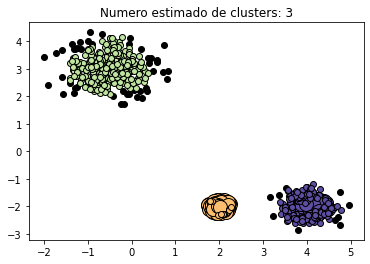

In [134]:
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Numero estimado de clusters: %d' % n_clusters_)
plt.show()

[demo dbscan](https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html)